In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Univ1 = pd.read_excel("University_Clustering.xlsx")
Univ1

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90
5,Dartmouth,NH,1340,89,23,10,32162,95
6,Duke,NC,1315,90,30,12,31585,95
7,Georgetown,DC,1255,74,24,12,20126,92
8,Harvard,MA,1400,91,14,11,39525,97
9,JohnsHopkins,MD,1305,75,44,7,58691,87


In [3]:
Univ1.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [4]:
Univ1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ KB


In [7]:
Univ = Univ1.drop(['State'], axis = 1)
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [8]:
# Normalization

def Norm(i):
    x = (i-i.min())/(i.max() - i.min())
    return x

In [48]:
df_norm = Norm(Univ.iloc[:,1:])
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SAT       25 non-null     float64
 1   Top10     25 non-null     float64
 2   Accept    25 non-null     float64
 3   SFRatio   25 non-null     float64
 4   Expenses  25 non-null     float64
 5   GradRate  25 non-null     float64
 6   clust     25 non-null     float64
dtypes: float64(7)
memory usage: 1.4 KB


In [12]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [17]:
z = linkage(df_norm, method="complete", metric="euclidean")
z

array([[11.        , 21.        ,  0.10626637,  2.        ],
       [12.        , 22.        ,  0.13187683,  2.        ],
       [ 8.        , 24.        ,  0.13239629,  2.        ],
       [ 5.        ,  6.        ,  0.15357479,  2.        ],
       [ 4.        , 25.        ,  0.18518411,  3.        ],
       [10.        , 16.        ,  0.19782036,  2.        ],
       [28.        , 30.        ,  0.24629762,  4.        ],
       [ 0.        ,  7.        ,  0.26741814,  2.        ],
       [ 3.        , 29.        ,  0.27803629,  4.        ],
       [14.        , 27.        ,  0.30357016,  3.        ],
       [31.        , 34.        ,  0.34007072,  7.        ],
       [32.        , 33.        ,  0.34110215,  6.        ],
       [13.        , 23.        ,  0.39456348,  2.        ],
       [ 9.        , 19.        ,  0.4942792 ,  2.        ],
       [26.        , 36.        ,  0.50082808,  8.        ],
       [15.        , 17.        ,  0.55679044,  2.        ],
       [18.        , 20.

Text(0, 0.5, 'Distance')

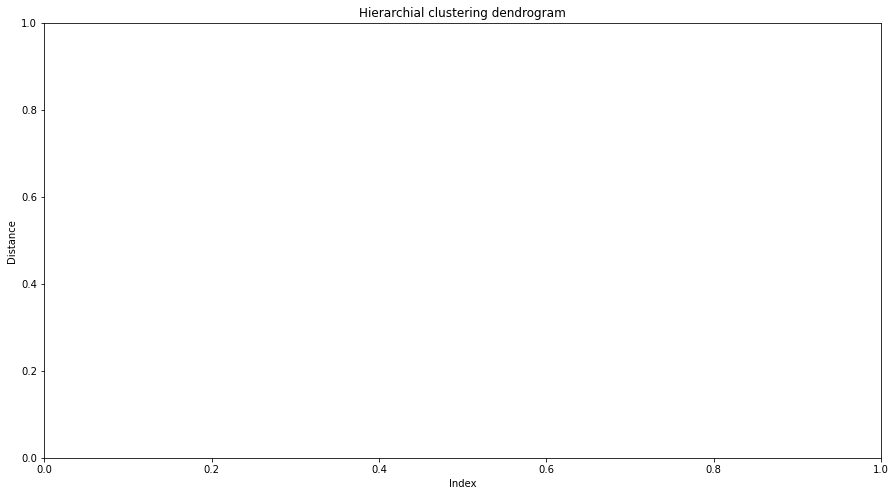

In [15]:
plt.figure(figsize = (15,8));plt.title('Hierarchial clustering dendrogram');plt.xlabel("Index");plt.ylabel("Distance")
# this createsa an empty plt

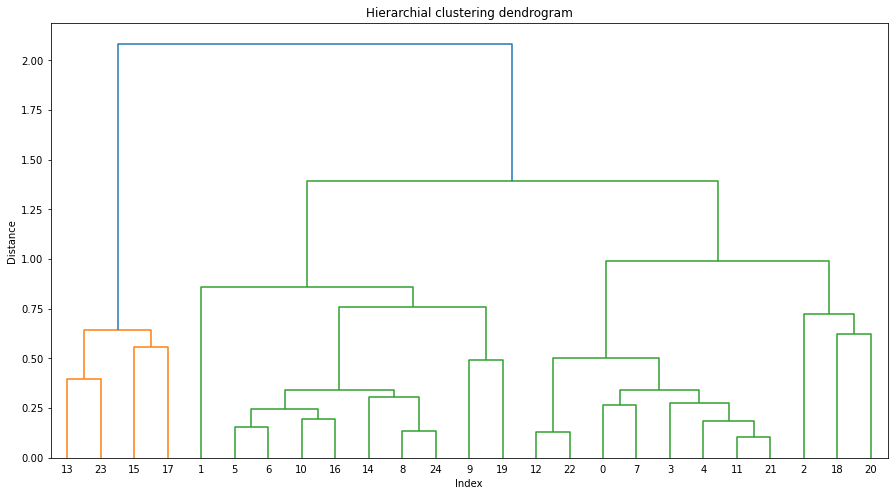

In [20]:
plt.figure(figsize = (15,8));plt.title('Hierarchial clustering dendrogram');plt.xlabel("Index");plt.ylabel("Distance")
# this createsa an empty plt

sch.dendrogram(z, leaf_rotation = 0, leaf_font_size = 10)
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
h_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity= 'euclidean').fit(df_norm)


In [28]:
cluster_labels = pd.Series(h_complete.labels_) # converting into a column

In [29]:
cluster_labels

0     0
1     2
2     0
3     0
4     0
5     2
6     2
7     0
8     2
9     2
10    2
11    0
12    0
13    1
14    2
15    1
16    2
17    1
18    0
19    2
20    0
21    0
22    0
23    1
24    2
dtype: int32

In [33]:
#assigning it to new colunm

Univ['clust']=  cluster_labels

In [35]:
Univ1 = Univ.iloc[:, [7,0,1,2,3,4,5,6]]
Univ1

,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,Brown,1310,89,22,13,22704,94
1,2,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,62,59,9,25026,72
3,0,Columbia,1310,76,24,12,31510,88
4,0,Cornell,1280,83,33,13,21864,90
5,2,Dartmouth,1340,89,23,10,32162,95
6,2,Duke,1315,90,30,12,31585,95
7,0,Georgetown,1255,74,24,12,20126,92
8,2,Harvard,1400,91,14,11,39525,97
9,2,JohnsHopkins,1305,75,44,7,58691,87


In [39]:
Univ1.iloc[:,2:].groupby(Univ1['clust']).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1260.0,78.818182,39.181818,12.818182,21446.909091,87.636364
1,1061.5,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1355.5,89.000000,26.900000,10.000000,40897.200000,91.700000


In [46]:
# get the output file
Univ1.to_csv("Universitynewoutput.csv")